In [30]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [2]:
# Cargar los datos de CSV
datos_csv = pd.read_csv("registro-administrativo-historico_2009-2023-inicio.csv", sep = ";")

C:\Users\Jaris Aizprua\AppData\Local\Temp\ipykernel_30212\2343196023.py:2: DtypeWarning: Columns (21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_csv = pd.read_csv("registro-administrativo-historico_2009-2023-inicio.csv", sep = ";")


In [3]:
# Cargar los datos de SQL
def create_connection():
    connection = None
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='admin',
            passwd='admin123',
            database='provincias'         
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

def read_table_with_pandas(connection):
    try:
        query = "SELECT * FROM poblacion_ecuador_csv"
        datos_sql = pd.read_sql(query, connection)
        print(datos_sql)
        return datos_sql
    except Error as e:
        print(f"The error '{e}' occurred")

# Conectarse a la base de datos
connection = create_connection()

# Leer la tabla 'poblacion_ecuador_csv' usando pandas
datos_sql = read_table_with_pandas(connection)

Connection to MySQL DB successful
           provincia                  capital  poblacion
0          Galapagos  Puerto Baquerizo Moreno     28 583
1   Zamora-Chinchipe                   Zamora    110 973
2            Pastaza                     Puyo    111 915
3               Napo                     Tena    131 675
4             Carchi                   Tulcán    172 828
5           Orellana                 Orellana    182 166
6    Morona-Santiago                    Macas    192 508
7          Sucumbios               Nueva Loja    199 014
8            Bolivar                 Guaranda    199 078
9              Cañar                  Azogues    227 578
10       Santa Elena              Santa Elena    385 735
11          Imbabura                   Ibarra    469 879
12          Cotopaxi                Latacunga    470 210
13        Chimborazo                 Riobamba    471 933
14              Loja                     Loja    485 421
15     Santo Domingo            Santo Domingo    492 9

C:\Users\Jaris Aizprua\AppData\Local\Temp\ipykernel_30212\585129076.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos_sql = pd.read_sql(query, connection)


In [4]:
# Resumen de los datos CSV
skim(datos_csv)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 306450 │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 21     │ │ int32       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Cod_Provincia          │   0 │     0 │      12 │   6.7 │     1 │     8 │     11 │     15 │     90 │   ▇▃   │  │
│ │ Cod_Canton             │   0 │     0 │    1200 │   670 │   100 │   810 │   1100 │   1500 │   9000 │   ▇▃   │  │
│ │ Cod_Parroquia          │   0 │     0 │  120000 │ 67000 │ 10000 │ 81000 │ 110000 │ 150000 │ 900000 │   ▇▃   │  │
│ │ Docentes_Femenino      │   0 │     0 │     7.5 │    12 │     0 │     1 │      3 │      9 │    250 │   ▇    │  │
│ │ Docentes_Masculino     │   0 │     0 │     3.3 │   6.6 │     0 │     0 │      1 │      3 │    210 │   ▇    │  │
│ │ Total_Docentes         │   0 │     0 │      11 │    18 │     0 │     1 │      4 │     12 │    370 │   ▇    │  │
│ │ Estudiantes_Femenino   │   0 │     0 │     110 │   220 │     0 │    10 │     28 │    100 │   7500 │   ▇    │  │
│ │ Estudiantes_Masculino  │   0 │     0 │     110 │   210 │     0 │    11 │     29 │    110 │   5900 │   ▇    │  │
│ │ Total_Estudiantes      │   0 │     0 │     210 │   400 │     1 │    21 │     57 │    220 │   9500 │   ▇    │  │
│ └────────────────────────┴─────┴───────┴─────────┴───────┴───────┴───────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Anio_lectivo                       │      0 │         0 │                         2 │               612900 │  │
│ │ Zona                               │      0 │         0 │                         2 │               612184 │  │
│ │ Provincia                          │      0 │         0 │                       1.3 │               383445 │  │
│ │ Canton                             │      0 │         0 │                       1.3 │               383105 │  │
│ │ Parroquia                          │      0 │         0 │                       1.9 │               573897 │  │
│ │ Nombre_Institucion                 │      0 │         0 │                       4.4 │              1341581 │  │
│ │ AMIE                               │      0 │         0 │                         1 │               306450 │  │
│ │ Tipo_Educacion                     │      0 │       

In [5]:
# Resumen de los datos SQL
skim(datos_sql)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 24     │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ provincia                 │       0 │          0 │                          1.2 │                       28 │  │
│ │ capital                   │       0 │          0 │                          1.2 │                       29 │  │
│ │ poblacion                 │       0 │          0 │                          2.1 │                       51 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
# Validar el formato de datos en la columna poblacion
datos_sql.head()

,provincia,capital,poblacion
0,Galapagos,Puerto Baquerizo Moreno,28 583
1,Zamora-Chinchipe,Zamora,110 973
2,Pastaza,Puyo,111 915
3,Napo,Tena,131 675
4,Carchi,Tulcán,172 828


In [7]:
# Eliminar los espacios en blanco y convertir la columna 'poblacion' a int
datos_sql['poblacion'] = datos_sql['poblacion'].str.replace(' ', '').astype(int)

# Convertir las columnas 'provincia' y 'capital' a mayúsculas
datos_sql['provincia'] = datos_sql['provincia'].str.upper()
datos_sql['capital'] = datos_sql['capital'].str.upper()

In [8]:
# Resumen de los datos SQL
skim(datos_sql)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 24     │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ poblacion     │   0 │     0 │  710000 │  1000000 │  29000 │  190000 │  470000 │  600000 │ 4400000 │   ▇▁   │  │
│ └───────────────┴─────┴───────┴─────────┴──────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ provincia                 │       0 │          0 │                          1.2 │                       28 │  │
│ │ capital                   │       0 │          0 │                          1.2 │                       29 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
# Validar que los nombres de provincias hagan match entre ambos dataset mediante un merge entre ambos para encontrar los registros de datos_sql que no están en datos_csv
merged_df = datos_sql.merge(datos_csv[['Provincia']], left_on='provincia', right_on='Provincia', how='left', indicator=True)

# Filtra los registros que no están en datos_csv
df_not_included = merged_df[merged_df['_merge'] == 'left_only']

# Muestra los registros que no están incluidos
print(df_not_included)

              provincia        capital  poblacion Provincia     _merge
371    ZAMORA-CHINCHIPE         ZAMORA     110973       NaN  left_only
20884   MORONA-SANTIAGO          MACAS     192508       NaN  left_only
92923     SANTO DOMINGO  SANTO DOMINGO     492969       NaN  left_only


In [10]:
# Revisar los nombres de provincias en datos_csv
print(datos_csv['Provincia'].unique())

['AZUAY' 'BOLIVAR' 'CAÑAR' 'CARCHI' 'COTOPAXI' 'CHIMBORAZO' 'EL ORO'
 'ESMERALDAS' 'GUAYAS' 'SANTA ELENA' 'IMBABURA' 'LOJA' 'LOS RIOS' 'MANABI'
 'MORONA SANTIAGO' 'NAPO' 'PASTAZA' 'PICHINCHA'
 'SANTO DOMINGO DE LOS TSACHILAS' 'TUNGURAHUA' 'ZAMORA CHINCHIPE'
 'GALAPAGOS' 'SUCUMBIOS' 'ORELLANA' 'Zona No Delimitada']


In [11]:
# Diccionario de mapeo para ajustar los nombres de las provincias
mapping_dict = {
    'ZAMORA-CHINCHIPE': 'ZAMORA CHINCHIPE',
    'MORONA-SANTIAGO': 'MORONA SANTIAGO',
    'SANTO DOMINGO': 'SANTO DOMINGO DE LOS TSACHILAS',}

# Reemplaza los nombres en la columna 'provincia' de datos_sql
datos_sql['provincia'] = datos_sql['provincia'].replace(mapping_dict)

# Realiza un merge de los dataframes para encontrar los registros de datos_sql que no están en datos_csv
merged_df = datos_sql.merge(datos_csv[['Provincia']], left_on='provincia', right_on='Provincia', how='left', indicator=True)

# Filtra los registros que no están en datos_csv
df_not_included = merged_df[merged_df['_merge'] == 'left_only']

# Muestra los registros que no están incluidos
print(df_not_included)

Empty DataFrame
Columns: [provincia, capital, poblacion, Provincia, _merge]
Index: []


In [12]:
# Realiza un merge para agregar la columna 'poblacion' de datos_sql a datos_csv
datos_completo = datos_csv.merge(datos_sql[['provincia', 'poblacion']], left_on='Provincia', right_on='provincia', how='left')

# Renombra la columna 'poblacion' y elimina la columna 'provincia' sobrante
datos_completo.rename(columns={'poblacion': 'Poblacion'}, inplace=True)
datos_completo.drop(columns=['provincia'], inplace=True)

# Muestra del nuevo dataset conformado por datos_csv y datos_sql
datos_completo.sample(10)

,Anio_lectivo,Zona,Provincia,Cod_Provincia,Canton,Cod_Canton,Parroquia,Cod_Parroquia,Nombre_Institucion,AMIE,...,Estudiantes_Femenino,Estudiantes_Masculino,Total_Estudiantes,Ecuatoriana,Colombiana,Venezolana,Peruana,Otros_Paises_de_America,Otros_Continentes,Poblacion
13236,2009-2010 Inicio,Zona 7,LOJA,11,CELICA,1104,CELICA,110450,MAXIMILIANO RODRIGUEZ LOAIZA,11H00721,...,62,76,138.000,138,0,0,0,0,0,485421.0
209671,2018-2019 Inicio,Zona 6,AZUAY,1,SIGSIG,109,LUDO,10954,ESCUELA DE EDUCACIÓN BÁSICA LUIS BENIGNO TORRES,01H01412,...,78,61,139.000,139,0,0,0,0,0,801609.0
10382,2009-2010 Inicio,Zona 5,GUAYAS,9,EL EMPALME,908,VELASCO IBARRA (CAB. EL EMPALME),90850,PADRE MATEO RODRIGUEZ,09H03857,...,16,15,31.000,31,0,0,0,0,0,4391923.0
76013,2011-2012 Inicio,Zona 3,PASTAZA,16,ARAJUNO,1604,CURARAY,160451,UNIDAD EDUCATIVA 15 NOVIEMBRE EXT TIWENO,16H00207,...,5,10,15.000,15,0,0,0,0,0,111915.0
256405,2020-2021 Inicio,Zona 3,TUNGURAHUA,18,SAN PEDRO DE PELILEO,1807,PELILEO,180701,UNIDAD EDUCATIVA MARIANO BENITEZ,18H00505,...,526,435,961.000,954,3,2,0,0,2,563532.0
293867,2023-2024 Inicio,Zona 5,GUAYAS,9,SALITRE,919,LA VICTORIA (ÑAUZA),91952,ESCUELA DE EDUCACIÓN BÁSICA 15 DE OCTUBRE,09H04896,...,11,19,30.000,30,0,0,0,0,0,4391923.0
262545,2021-2022 Inicio,Zona 8,GUAYAS,9,GUAYAQUIL,901,GARCIA MORENO,90105,ESCUELA DE EDUCACION BASICA FISCAL VICTOR EMIL...,09H00490,...,202,215,417.000,394,0,21,1,1,0,4391923.0
275182,2022-2023 Inicio,Zona 7,EL ORO,7,PIÑAS,710,LA MATRIZ,71001,COLEGIO DE BACHILLERATO 8 DE NOVIEMBRE,07H00852,...,727,786,1.513,1.437,2,11,1,13,49,714592.0
60107,2011-2012 Inicio,Zona 7,EL ORO,7,ZARUMA,713,ZARUMA,71350,COLEGIO FISCAL POPILAR ZARUMA,07H01185,...,73,22,95.000,94,0,0,1,0,0,714592.0
259098,2021-2022 Inicio,Zona 5,BOLIVAR,2,GUARANDA,201,FACUNDO VELA,20151,CECIB DE EB 20 DE AGOSTO,02B00102,...,10,10,20.000,20,0,0,0,0,0,199078.0


In [13]:
# Resumen del nuevo dataset
skim(datos_completo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 306450 │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA % ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Cod_Provincia      │   0 │    0 │      12 │     6.7 │     1 │      8 │     11 │      15 │      90 │   ▇▃   │  │
│ │ Cod_Canton         │   0 │    0 │    1200 │     670 │   100 │    810 │   1100 │    1500 │    9000 │   ▇▃   │  │
│ │ Cod_Parroquia      │   0 │    0 │  120000 │   67000 │ 10000 │  81000 │ 110000 │  150000 │  900000 │   ▇▃   │  │
│ │ Docentes_Femenino  │   0 │    0 │     7.5 │      12 │     0 │      1 │      3 │       9 │     250 │   ▇    │  │
│ │ Docentes_Masculino │   0 │    0 │     3.3 │     6.6 │     0 │      0 │      1 │       3 │     210 │   ▇    │  │
│ │ Total_Docentes     │   0 │    0 │      11 │      18 │     0 │      1 │      4 │      12 │     370 │   ▇    │  │
│ │ Estudiantes_Femeni │   0 │    0 │     110 │     220 │     0 │     10 │     28 │     100 │    7500 │   ▇    │  │
│ │ no                 │     │      │         │         │       │        │        │         │         │        │  │
│ │ Estudiantes_Mascul │   0 │    0 │     110 │     210 │     0 │     11 │     29 │     110 │    5900 │   ▇    │  │
│ │ ino                │     │      │         │         │       │        │        │         │         │        │  │
│ │ Total_Estudiantes  │   0 │    0 │     210 │     400 │     1 │     21 │     57 │     220 │    9500 │   ▇    │  │
│ │ Poblacion          │ 716 │ 0.23 │ 1600000 │ 1500000 │ 29000 │ 470000 │ 800000 │ 3100000 │ 4400000 │ ▇▂▂ ▂▃ │  │
│ └────────────────────┴─────┴──────┴─────────┴─────────┴───────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Anio_lectivo                       │      0 │         0 │                         2 │               612900 │  │
│ │ Zona                               │      0 │         0 │                         2 │               612184 │  │
│ │ Provincia                          │      0 │         0 │                       1.3 │               383445 │  │
│ │ Canton                             │      0 │         0 │                       1.3 │               383105 │  │
│ │ Parroquia                          │      0 │       

In [14]:
# Mostrar valores nulos de poblacion respecto a las provincias
# Filtrar las filas donde la columna 'poblacion' tiene valores nulos
valores_nulos_por_provincia = datos_completo[datos_completo['Poblacion'].isnull()]

# Contar los valores nulos en base a la variable 'Provincia'
conteo_nulos_por_provincia = valores_nulos_por_provincia.groupby('Provincia').size()

# Mostrar el conteo de valores nulos por provincia
print(conteo_nulos_por_provincia)

Provincia
Zona No Delimitada    716
dtype: int64


In [15]:
# Considerando que el total de valores nulos son 716 registros, y corresponden al 0.23% del dataset, procedemos a eliminarlos
datos_completo = datos_completo.dropna(subset=['Poblacion']).reset_index(drop=True)

In [17]:
# Resumen del nuevo dataset
skim(datos_completo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 305734 │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Cod_Provincia       │  0 │    0 │      11 │     5.5 │     1 │      8 │     11 │      15 │      24 │ ▃▃▇▅▃▂ │  │
│ │ Cod_Canton          │  0 │    0 │    1200 │     550 │   100 │    810 │   1100 │    1500 │    2400 │ ▃▃▇▅▃▂ │  │
│ │ Cod_Parroquia       │  0 │    0 │  120000 │   55000 │ 10000 │  81000 │ 110000 │  150000 │  240000 │ ▃▃▇▅▃▂ │  │
│ │ Docentes_Femenino   │  0 │    0 │     7.6 │      12 │     0 │      1 │      3 │       9 │     250 │   ▇    │  │
│ │ Docentes_Masculino  │  0 │    0 │     3.3 │     6.6 │     0 │      0 │      1 │       3 │     210 │   ▇    │  │
│ │ Total_Docentes      │  0 │    0 │      11 │      18 │     0 │      1 │      4 │      13 │     370 │   ▇    │  │
│ │ Estudiantes_Femenin │  0 │    0 │     110 │     220 │     0 │     10 │     28 │     100 │    7500 │   ▇    │  │
│ │ o                   │    │      │         │         │       │        │        │         │         │        │  │
│ │ Estudiantes_Masculi │  0 │    0 │     110 │     210 │     0 │     11 │     29 │     110 │    5900 │   ▇    │  │
│ │ no                  │    │      │         │         │       │        │        │         │         │        │  │
│ │ Total_Estudiantes   │  0 │    0 │     210 │     400 │     1 │     21 │     57 │     220 │    9500 │   ▇    │  │
│ │ Poblacion           │  0 │    0 │ 1600000 │ 1500000 │ 29000 │ 470000 │ 800000 │ 3100000 │ 4400000 │ ▇▂▂ ▂▃ │  │
│ └─────────────────────┴────┴──────┴─────────┴─────────┴───────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Anio_lectivo                       │      0 │         0 │                         2 │               611468 │  │
│ │ Zona                               │      0 │         0 │                         2 │               611468 │  │
│ │ Provincia                          │      0 │         0 │                       1.2 │               381297 │  │
│ │ Canton                             │      0 │         0 │                       1.2 │               380065 │  │
│ │ Parroquia                          │      0 │       

In [18]:
# Definir listas de regiones para agregar nueva columna
provincias_costa = ['ESMERALDAS', 'MANABI', 'SANTA ELENA', 'LOS RIOS', 'GUAYAS', 'EL ORO']
provincias_sierra = ['CARCHI', 'IMBABURA', 'PICHINCHA', 'SANTO DOMINGO DE LOS TSACHILAS', 'COTOPAXI', 'BOLIVAR', 'TUNGURAHUA', 'CHIMBORAZO', 'CAÑAR', 'AZUAY', 'LOJA']
provincias_oriente = ['SUCUMBIOS', 'ORELLANA', 'NAPO', 'PASTAZA', 'MORONA SANTIAGO', 'ZAMORA CHINCHIPE']
provincias_insular = ['GALAPAGOS']

In [19]:
# Función para asignar la región en base a la provincia
def asignar_region(provincia):
    if provincia in provincias_costa:
        return 'COSTA'
    elif provincia in provincias_sierra:
        return 'SIERRA'
    elif provincia in provincias_oriente:
        return 'ORIENTE'
    elif provincia in provincias_insular:
        return 'INSULAR'
    else:
        return 'DESCONOCIDO'

# Aplicar la función para crear la nueva columna 'Region'
datos_completo['Region'] = datos_completo['Provincia'].apply(asignar_region)

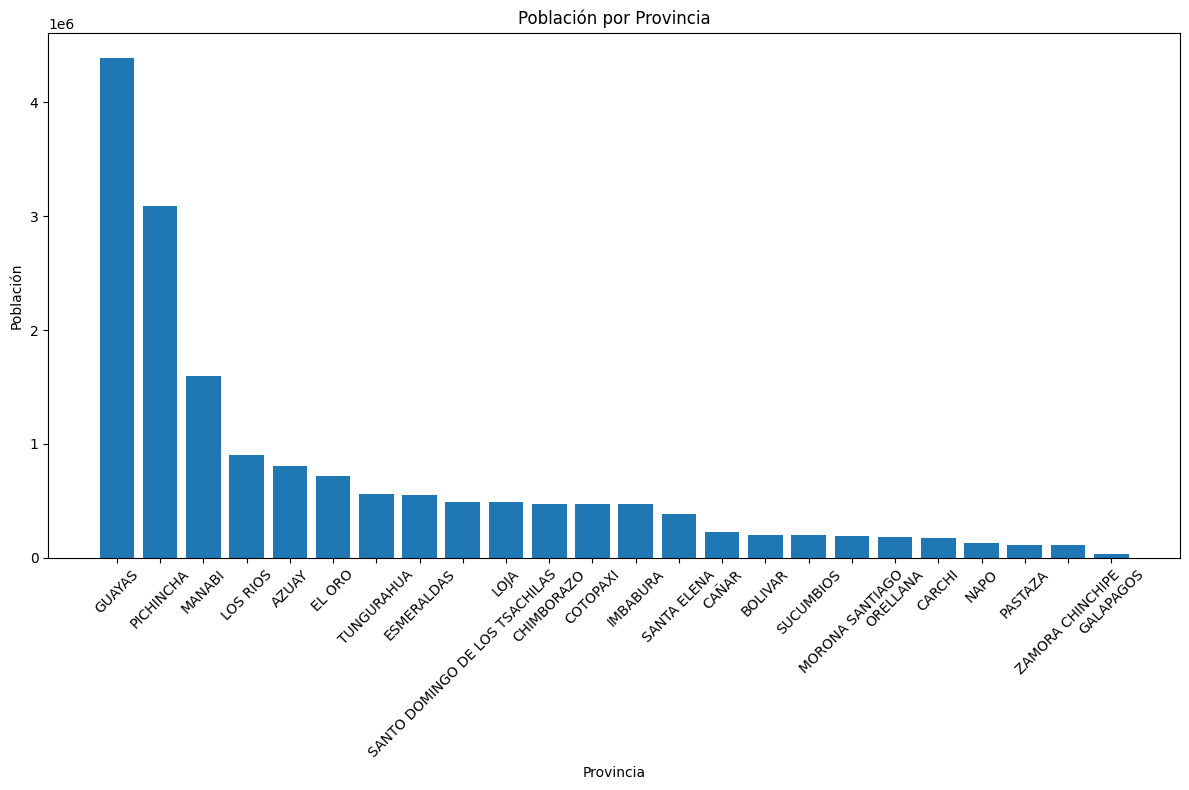

In [20]:
# Eliminar duplicados para tomar solo el primer registro de cada provincia
datos_completo_unique = datos_completo.drop_duplicates(subset='Provincia')

# Ordenar por la columna 'poblacion' de mayor a menor
datos_completo_unique = datos_completo_unique.sort_values(by='Poblacion', ascending=False)

# Gráfica de la población por cada provincia
plt.figure(figsize=(12, 8))
plt.bar(datos_completo_unique['Provincia'], datos_completo_unique['Poblacion'])
plt.xlabel('Provincia')
plt.ylabel('Población')
plt.title('Población por Provincia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

         Total_Registros  Total_Poblacion
Region                                   
COSTA                  6        8537642.0
INSULAR                1          28583.0
ORIENTE                6         928251.0
SIERRA                11        7444510.0


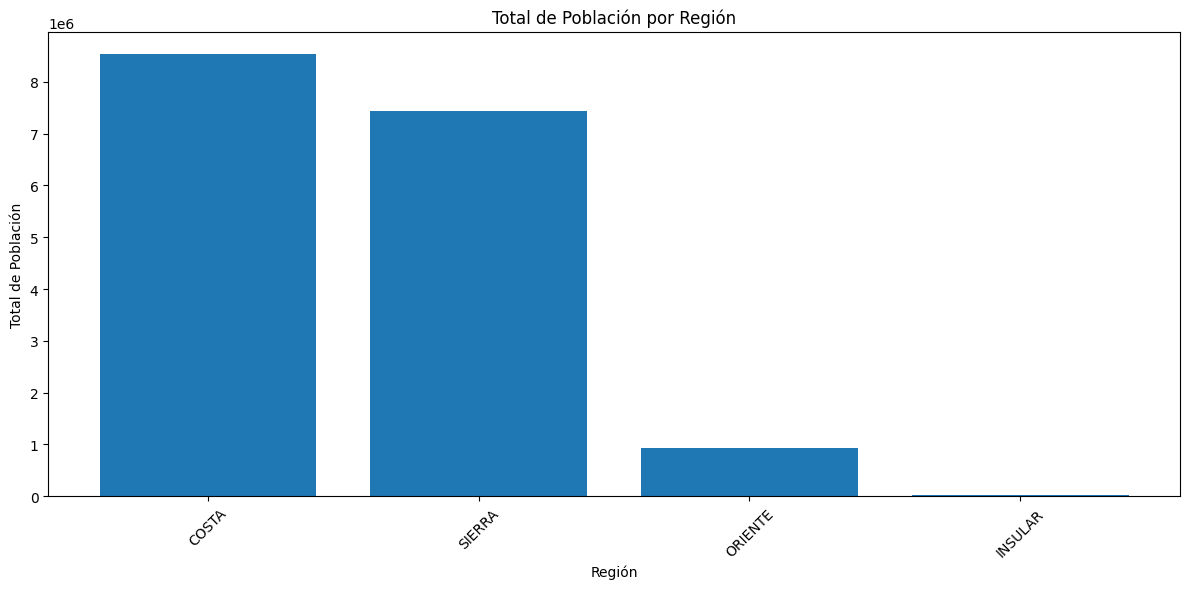

In [21]:
# Agrupar por región y calcular el total de registros y la suma de población
conteo_y_poblacion_por_region = datos_completo_unique.groupby('Region').agg({
    'Provincia': 'count',
    'Poblacion': 'sum'
}).rename(columns={'Provincia': 'Total_Registros', 'Poblacion': 'Total_Poblacion'})

# Ordenar los datos de mayor a menor por Total_Poblacion
conteo_y_poblacion_por_region_sorted = conteo_y_poblacion_por_region.sort_values(by='Total_Poblacion', ascending=False)

# Mostrar el resultado
print(conteo_y_poblacion_por_region)

# Graficar la suma de la población por región
plt.figure(figsize=(12, 6))
plt.bar(conteo_y_poblacion_por_region_sorted.index, conteo_y_poblacion_por_region_sorted['Total_Poblacion'])
plt.xlabel('Región')
plt.ylabel('Total de Población')
plt.title('Total de Población por Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jaris Aizprua\AppData\Local\Temp\ipykernel_30212\2538096474.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Area', data=datos_completo, palette='Set3')
C:\Users\Jaris Aizprua\AppData\Local\Temp\ipykernel_30212\2538096474.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jurisdiccion', data=datos_completo, palette='Accent')
C:\Users\Jaris Aizprua\AppData\Local\Temp\ipykernel_30212\2538096474.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=datos_completo, palette='Dark2')


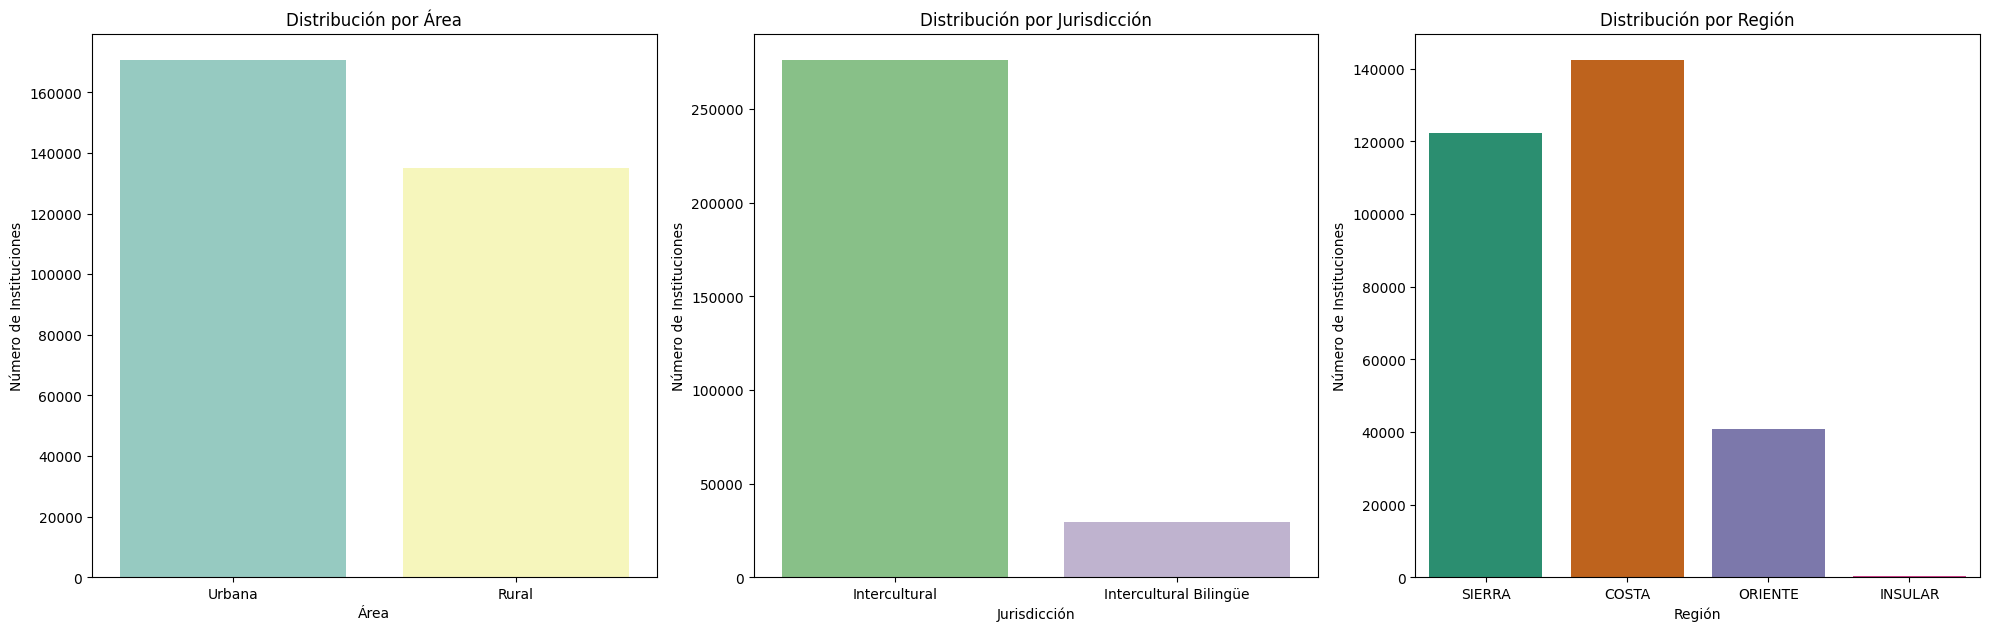

In [22]:
# Crear gráficos para analizar la distribución del tipo de educación, tipo de sostenimiento, área, régimen escolar y jurisdicción
plt.figure(figsize=(20, 12))

# Gráfico para el área (urbana o rural)
plt.subplot(2, 3, 1)
sns.countplot(x='Area', data=datos_completo, palette='Set3')
plt.title('Distribución por Área')
plt.xlabel('Área')
plt.ylabel('Número de Instituciones')

# Gráfico para la jurisdicción
plt.subplot(2, 3, 2)
sns.countplot(x='Jurisdiccion', data=datos_completo, palette='Accent')
plt.title('Distribución por Jurisdicción')
plt.xlabel('Jurisdicción')
plt.ylabel('Número de Instituciones')

# Gráfico para la región
plt.subplot(2, 3, 3)
sns.countplot(x='Region', data=datos_completo, palette='Dark2')
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Número de Instituciones')

plt.tight_layout()
plt.show()

In [45]:
# Verificar y reemplazar valores cero en Total_Docentes por NaN
datos_completo['Total_Docentes'].replace(0, np.nan, inplace=True)

# Calcular la relación No. DOCENTES vs No. ESTUDIANTES
datos_completo['Relacion_Docentes_Estudiantes'] = datos_completo['Total_Estudiantes'] / datos_completo['Total_Docentes']

# Reemplazar NaN resultantes de la división por cero
datos_completo['Relacion_Docentes_Estudiantes'].fillna(0, inplace=True)

# Volver a cero los valores NaN en Total_Docentes
datos_completo['Total_Docentes'].fillna(0, inplace=True)

## COLUMNA PORCENTAJE DE ESTUDIANTES EXTRANJEROS vs NACIONALES
# Convertir columnas a tipo numérico
columnas_numericas = ['Colombiana', 'Venezolana', 'Peruana', 'Otros_Paises_de_America', 'Otros_Continentes', 'Total_Estudiantes', 'Total_Docentes']
datos_csv[columnas_numericas] = datos_csv[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Verificar y reemplazar valores cero en Total_Estudiantes por NaN
datos_csv['Total_Estudiantes'].replace(0, np.nan, inplace=True)

# Calcular el porcentaje de estudiantes extranjeros
datos_completo['Porcentaje_Estudiantes_Extranjeros'] = (
    (datos_csv['Colombiana'] + datos_csv['Venezolana'] + datos_csv['Peruana'] + 
     datos_csv['Otros_Paises_de_America'] + datos_csv['Otros_Continentes']) / 
    datos_csv['Total_Estudiantes']) * 100

# Reemplazar NaN resultantes de la división por cero
datos_completo['Porcentaje_Estudiantes_Extranjeros'].fillna(0, inplace=True)

## COLUMNA CLASIFICACION DEL TAMAÑO DE ESCUELAS, en base a la cantidad de alumnos
def clasificar_institucion(num_estudiantes):
    if num_estudiantes < 100:
        return 'Pequeña'
    elif num_estudiantes < 500:
        return 'Mediana'
    else:
        return 'Grande'
datos_completo['Tamaño_Institucion'] = datos_completo['Total_Estudiantes'].apply(clasificar_institucion)

In [46]:
skim(datos_completo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 305734 │ │ string      │ 14    │                                                          │
│ │ Number of columns │ 26     │ │ int32       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Cod_Provincia       │  0 │    0 │      11 │     5.5 │     1 │      8 │     11 │      15 │      24 │ ▃▃▇▅▃▂ │  │
│ │ Cod_Canton          │  0 │    0 │    1200 │     550 │   100 │    810 │   1100 │    1500 │    2400 │ ▃▃▇▅▃▂ │  │
│ │ Cod_Parroquia       │  0 │    0 │  120000 │   55000 │ 10000 │  81000 │ 110000 │  150000 │  240000 │ ▃▃▇▅▃▂ │  │
│ │ Docentes_Femenino   │  0 │    0 │     7.6 │      12 │     0 │      1 │      3 │       9 │     250 │   ▇    │  │
│ │ Docentes_Masculino  │  0 │    0 │     3.3 │     6.6 │     0 │      0 │      1 │       3 │     210 │   ▇    │  │
│ │ Total_Docentes      │  0 │    0 │      11 │      18 │     0 │      1 │      4 │      13 │     370 │   ▇    │  │
│ │ Estudiantes_Femenin │  0 │    0 │     110 │     220 │     0 │     10 │     28 │     100 │    7500 │   ▇    │  │
│ │ o                   │    │      │         │         │       │        │        │         │         │        │  │
│ │ Estudiantes_Masculi │  0 │    0 │     110 │     210 │     0 │     11 │     29 │     110 │    5900 │   ▇    │  │
│ │ no                  │    │      │         │         │       │        │        │         │         │        │  │
│ │ Total_Estudiantes   │  0 │    0 │     210 │     400 │     1 │     21 │     57 │     220 │    9500 │   ▇    │  │
│ │ Poblacion           │  0 │    0 │ 1600000 │ 1500000 │ 29000 │ 470000 │ 800000 │ 3100000 │ 4400000 │ ▇▂▂ ▂▃ │  │
│ │ Relacion_Docentes_E │  0 │    0 │      18 │      12 │     0 │     11 │     17 │      23 │    1400 │   ▇    │  │
│ │ studiantes          │    │      │         │         │       │        │        │         │         │        │  │
│ │ Porcentaje_Estudian │  0 │    0 │     2.2 │     110 │     0 │      0 │      0 │    0.14 │   21000 │   ▇    │  │
│ │ tes_Extranjeros     │    │      │         │         │       │        │        │         │         │        │  │
│ └─────────────────────┴────┴──────┴─────────┴─────────┴───────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Anio_lectivo                       │      0 │       

### Gráficas con Bokeh

In [83]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource

output_notebook()

# Gráfico de barras para el tipo de educación
tipo_educacion_counts = datos_completo['Tipo_Educacion'].value_counts()
tipo_educacion = tipo_educacion_counts.index.tolist()
counts = tipo_educacion_counts.values.tolist()

source = ColumnDataSource(data=dict(tipo_educacion=tipo_educacion, counts=counts))

p1 = figure(x_range=tipo_educacion, height=350, width=600, title="Distribución por Tipo de Educación",
           toolbar_location=None, tools="")
p1.vbar(x='tipo_educacion', top='counts', width=0.9, source=source, legend_field="tipo_educacion",
       line_color='white', fill_color=factor_cmap('tipo_educacion', palette="Spectral6", factors=tipo_educacion))

p1.xgrid.grid_line_color = None
p1.y_range.start = 0
p1.xaxis.axis_label = "Tipo de Educación"
p1.yaxis.axis_label = "Número de Instituciones"
p1.legend.orientation = "horizontal"
p1.legend.location = "top_center"

show(p1)

# Gráfico de barras para el tipo de sostenimiento
sostenimiento_counts = datos_completo['Sostenimiento'].value_counts()
sostenimiento = sostenimiento_counts.index.tolist()
counts = sostenimiento_counts.values.tolist()

source = ColumnDataSource(data=dict(sostenimiento=sostenimiento, counts=counts))

p2 = figure(x_range=sostenimiento, height=350, width=600, title="Distribución por Tipo de Sostenimiento",
           toolbar_location=None, tools="")
p2.vbar(x='sostenimiento', top='counts', width=0.9, source=source, legend_field="sostenimiento",
       line_color='white', fill_color=factor_cmap('sostenimiento', palette="Spectral6", factors=sostenimiento))

p2.xgrid.grid_line_color = None
p2.y_range.start = 0
p2.xaxis.axis_label = "Sostenimiento"
p2.yaxis.axis_label = "Número de Instituciones"
p2.legend.orientation = "horizontal"
p2.legend.location = "top_center"

show(p2)

Loading BokehJS ...

### Gráficas con PygWalker

In [49]:
import pygwalker as pyg

walker = pyg.walk(datos_completo)

Box(children=(HTML(value='<div id="ifr-pyg-0006191191ba37356Jdx17RDCQ289Hqn" style="height: auto">\n    <head>…